<a href="https://colab.research.google.com/github/mKozik7/Data_Analytics/blob/main/Nba2k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [593]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime
currentYear = datetime.now().year


In [594]:
df = pd.read_csv('nba2k.csv', index_col = False)
print(df[['full_name','salary','rating','position']])
df.loc[df['rating'].idxmax()]

                 full_name    salary  rating position
0             LeBron James  37436858      97        F
1            Kawhi Leonard  32742000      97        F
2    Giannis Antetokounmpo  25842697      96      F-G
3             Kevin Durant  37199000      96        F
4             James Harden  38199000      96        G
..                     ...       ...     ...      ...
434           Kevin Durant  40918900      95        F
435          Anthony Davis  35361360      95      F-C
436            Luka Doncic  10174391      94      G-F
437         Damian Lillard  39344900      94        G
438            Joel Embiid  31579390      91        C

[439 rows x 4 columns]


full_name              LeBron James
rating                           97
jersey                          #23
team             Los Angeles Lakers
position                          F
b_day                      12/30/84
height                   6-9 / 2.06
weight         250 lbs. / 113.4 kg.
salary                     37436858
country                         USA
draft_year                     2003
draft_round                       1
draft_peak                        1
college                         NaN
version                     NBA2k20
Name: 0, dtype: object

In [595]:
initial_population = []
positions = ['F','F-G','C','G','G-F','C-F','F-C']


In [596]:
def initial_population(data,n, positions):
  init_population = []
  for i in range(n):
    team = []
    for j in positions:
      player = data[data['position'] == j].sample(1)
      team.append(player.iloc[0].full_name)
    init_population.append(team)
  return init_population
  

In [597]:
def crossover(pop1, pop2):
    if random.random() < probability_crossover:
        pos = random.randint(0,len(pop1))
        crossed_pop1 = pop1[:pos] + pop2[pos:]
        crossed_pop2 = pop2[:pos] + pop1[pos:]
        return [crossed_pop1, crossed_pop2]

    else:
        return [pop1,pop2]


In [598]:
def mutation(indv,positions,data):
  new_indv = indv.copy()
  for i in range(0,len(indv)):
    player = data[data['position'] == positions[i]].sample(1)
    new_indv[i] = player.iloc[0]['full_name']
  return  new_indv
  
    

In [599]:
def argsort_list(seq):
    return [x for x,y in sorted(enumerate(seq), key = lambda x: x[1])]

In [600]:
def elitism(original_data, population, offspring, budget):
    
    scores_pop = evaluate_population(original_data, population, budget)
    scores_offs = evaluate_population(original_data, offspring, budget)
    
    comp_elite = int(len(population) * elitism_size)
    
    population = [population[ind] for ind in argsort_list(scores_pop)]
    offspring = [offspring[ind] for ind in argsort_list(scores_offs)]
    
    new_population = population[:comp_elite] + offspring[:len(population) - comp_elite]

    return new_population

In [601]:
def indv_value(indv, data):

    accumulated_value = 0
    for i in indv:
        p = data[data['full_name'] == i]
        accumulated_value += p.iloc[0].salary
        
    return accumulated_value


In [602]:
def evaluate_population(original_data, population, budget):
    alpha = 0.6
    beta = 0
    gamma = 0
    theta = 0.4
    
    max_values = [budget, 21, 97, 45780966]
    scores = []
    for indv in population:
        accumulated_value = []
        ages = []
        ratings = []
        for i in indv:
            p = original_data[original_data['full_name'] == i].iloc[0]
            
            accumulated_value.append( p.salary)
            ages.append(currentYear - p["draft_year"])

            ratings.append(original_data['rating'] == p.rating)
                
        scores.append(round(alpha * (np.abs(budget - np.sum(accumulated_value))/max_values[0])
                            + beta * (np.median(ages)/max_values[1]) 
                            + gamma * (np.mean(ratings)/max_values[2])
                            + theta * (45780966-np.min(accumulated_value)/max_values[3]), 2))

    return scores

In [603]:
def evolve(data,positions,budget):
  num_iters = 50
  scores = np.zeros(num_iters)
  best_indv = None
  best_score = float('+inf')
  population = initial_population(data, n_pop, positions)
  for it in range(num_iters):
    pool = population
    parents = []
    ### Crossover
    for j in range(0,n_pop-1,2):
      indiv_1 = pool[j]
      indiv_2 = pool[j+1]
      parents.extend(crossover(indiv_1,indiv_2))
    ### Mutation
    offspring = []
    for indiv in parents:
      offspring.append(mutation(indiv,positions,data))
    
    
    population = elitism(data, population, offspring, budget)
    pop_scores = evaluate_population(data, population, budget)
    
    for i in range(len(pop_scores)):
      if pop_scores[i] < best_score:
        best_indv = pop_scores[i]
        best_players = population[i]
        best_score = pop_scores[i]
    scores[it] = np.mean(pop_scores)

    if it % 5 == 0:
      print("Iteration ", it, ": Average Score:", round(scores[it], 3), "Best so far:", round(best_score, 3), best_players)

  plt.figure(figsize=(12, 8))
  plt.plot(scores)
  plt.xlabel('Iterations')
  plt.ylabel('Score')
  plt.title('Score Evolution')
  plt.show()
    
  print('Best players for {}:'.format(positions))

  for i in best_players:
      player1 = data[data['full_name'] == i]
      print(f'{i}:\n\tRating: {player1.iloc[0].rating}, Salary: {player1.iloc[0].salary}, expirence: {currentYear - player1.iloc[0].draft_year}')
            
  print('\nMax Budget: ', budget)
  print('Budget Used: ', indv_value(best_players, data))



Iteration  0 : Average Score: 18312386.559 Best so far: 18312386.37 ['Doug McDermott', 'Mikal Bridges', 'Ian Mahinmi', 'Fred VanVleet', 'Bojan Bogdanovic', 'Al Horford', 'Myles Turner']
Iteration  5 : Average Score: 18312386.425 Best so far: 18312386.37 ['Doug McDermott', 'Mikal Bridges', 'Ian Mahinmi', 'Fred VanVleet', 'Bojan Bogdanovic', 'Al Horford', 'Myles Turner']
Iteration  10 : Average Score: 18312386.411 Best so far: 18312386.36 ['Michael Kidd-Gilchrist', 'Trevor Ariza', 'Kelly Olynyk', 'Langston Galloway', 'CJ Miles', 'Cody Zeller', 'Anthony Davis']
Iteration  15 : Average Score: 18312386.405 Best so far: 18312386.36 ['Michael Kidd-Gilchrist', 'Trevor Ariza', 'Kelly Olynyk', 'Langston Galloway', 'CJ Miles', 'Cody Zeller', 'Anthony Davis']
Iteration  20 : Average Score: 18312386.402 Best so far: 18312386.36 ['Michael Kidd-Gilchrist', 'Trevor Ariza', 'Kelly Olynyk', 'Langston Galloway', 'CJ Miles', 'Cody Zeller', 'Anthony Davis']
Iteration  25 : Average Score: 18312386.4 Best so

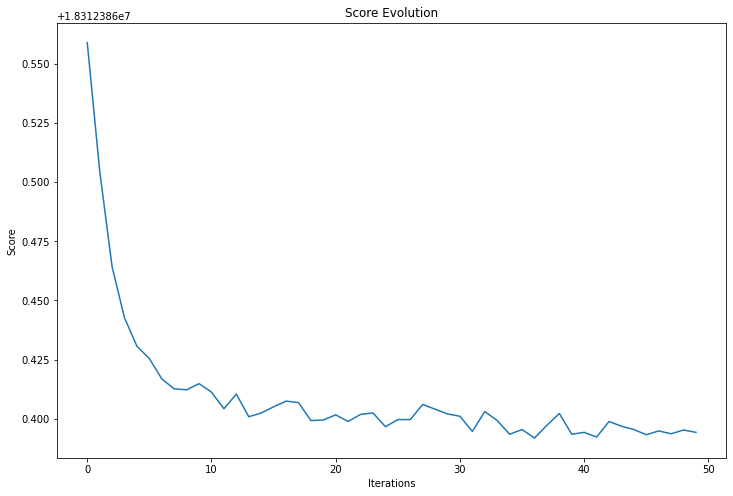

Best players for ['F', 'F-G', 'C', 'G', 'G-F', 'C-F', 'F-C']:
Michael Kidd-Gilchrist:
	Rating: 76, Salary: 12784359, expirence: 10
Trevor Ariza:
	Rating: 76, Salary: 12200000, expirence: 18
Kelly Olynyk:
	Rating: 78, Salary: 12667885, expirence: 9
Langston Galloway:
	Rating: 72, Salary: 7333333, expirence: 8
CJ Miles:
	Rating: 73, Salary: 8730158, expirence: 17
Cody Zeller:
	Rating: 77, Salary: 14471910, expirence: 9
Anthony Davis:
	Rating: 94, Salary: 27093019, expirence: 10

Max Budget:  100000000
Budget Used:  95280664


In [604]:
positions = ['F','F-G','C','G','G-F','C-F','F-C']
n_pop =50 
n = 50
elitism_size = 0.8
probability_crossover = 0.85
evolve(df,positions,100000000)